# 第一部分 预测某工业生产数据

In [1]:
import warnings
warnings.filterwarnings("ignore")
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [2]:
dta=[10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422, 
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355, 
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767, 
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232, 
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248, 
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722, 
11999,9390,13481,14795,15845,15271,14686,11054,10395]

In [3]:
#此处将数据备份一份，随后会将数据修改，需要保留一份源数据
dta0=pd.Series(dta[:],index=sm.tsa.datetools.dates_from_range('2001','2090'))

In [4]:
#即数据长度
len(dta)

90

In [5]:
#使用pandas.Series容器封装数据，相比List，Series添加了时间索引，更适用于时间序列预测
dta=pd.Series(dta) 
#为数据添加时间索引
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2001','2090'))
#绘图，观察数据趋势
dta.plot(figsize=(12,8))

In [6]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
#对原始数据做一阶差分，观察数据
diff1 = dta.diff(1)
diff1.plot(ax=ax1)

In [7]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
# 绘制ACF图
fig = sm.graphics.tsa.plot_acf(dta,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
# 绘制PACF图
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)

In [8]:
# 一阶差分
dta= dta.diff(1)[1:]
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
# 绘制ACF图
fig = sm.graphics.tsa.plot_acf(dta,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
# 绘制PACF图
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)

In [9]:
# 使用ARMA(p,q)模型进行拟合，并观察拟合效果
# AIC，BIC,HQIC都是衡量拟合效果的指标，越小越好
# 随q和p的增大，计算量会急剧增加，因此pq不会取得太大，通常最大取10
arma_mod70 = sm.tsa.ARMA(dta,(7,0)).fit()
print(arma_mod70.aic,arma_mod70.bic,arma_mod70.hqic)
arma_mod30 = sm.tsa.ARMA(dta,(0,1)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod71 = sm.tsa.ARMA(dta,(7,1)).fit()
print(arma_mod71.aic,arma_mod71.bic,arma_mod71.hqic)
arma_mod80 = sm.tsa.ARMA(dta,(8,0)).fit()
print(arma_mod80.aic,arma_mod80.bic,arma_mod80.hqic)
# arma_mod150 = sm.tsa.ARMA(dta,(15,0)).fit()
# print(arma_mod150.aic,arma_mod150.bic,arma_mod150.hqic)
# arma_mod160 = sm.tsa.ARMA(dta,(16,0)).fit()
# print(arma_mod160.aic,arma_mod160.bic,arma_mod160.hqic)

1579.7025547778896 1602.100282105479 1588.730435909947
1632.3203733166176 1639.786282425814 1635.3296670273035


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1581.0916075914954 1605.977971288817 1591.1225866271147
1581.3957835816125 1606.282147278934 1591.4267626172318


In [10]:
# p=7，q=0，模型拟合结果较好，提取其残差进行后续处理
resid = arma_mod70.resid

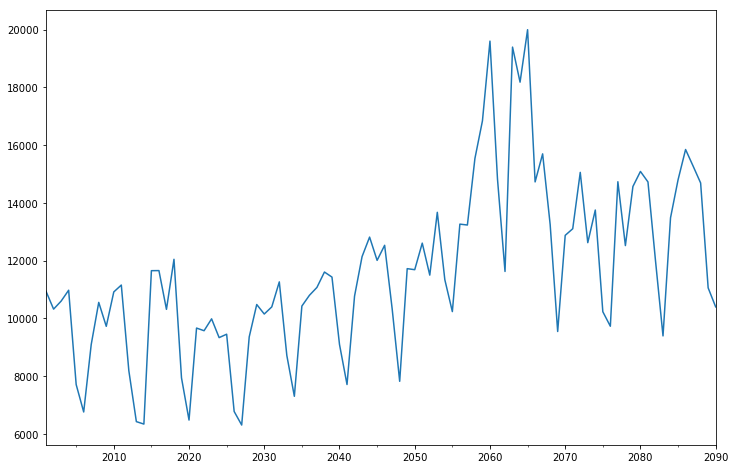

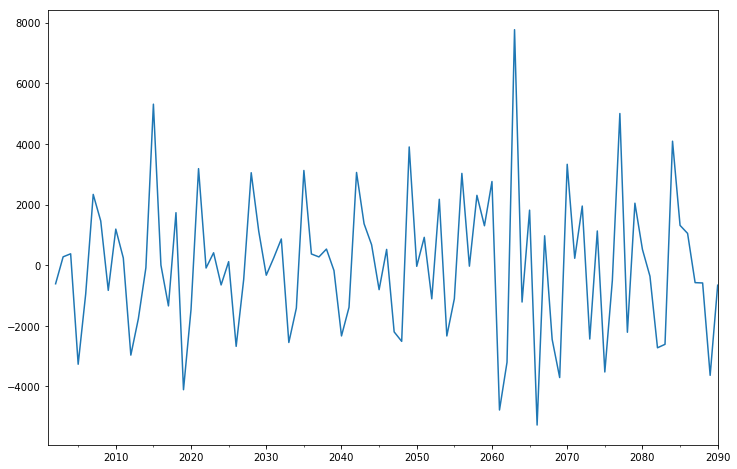

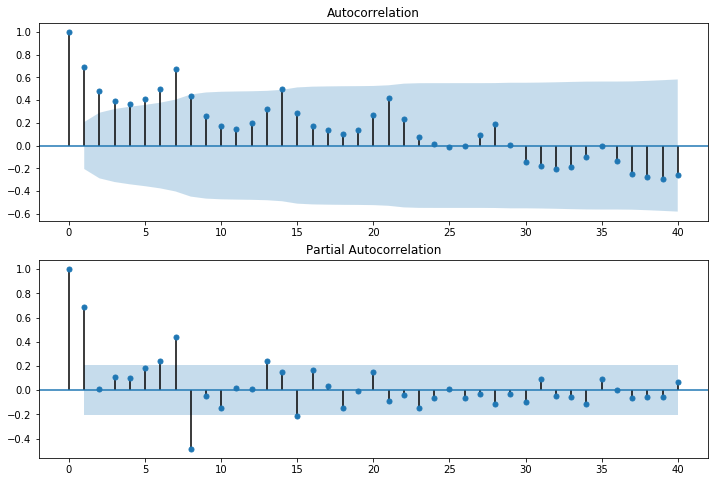

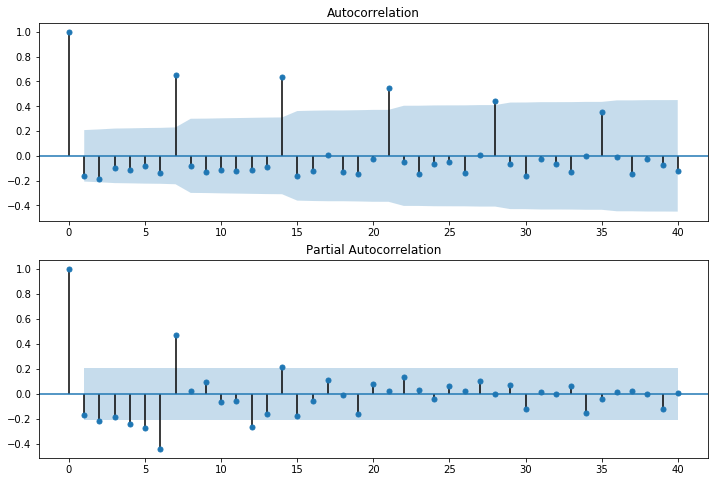

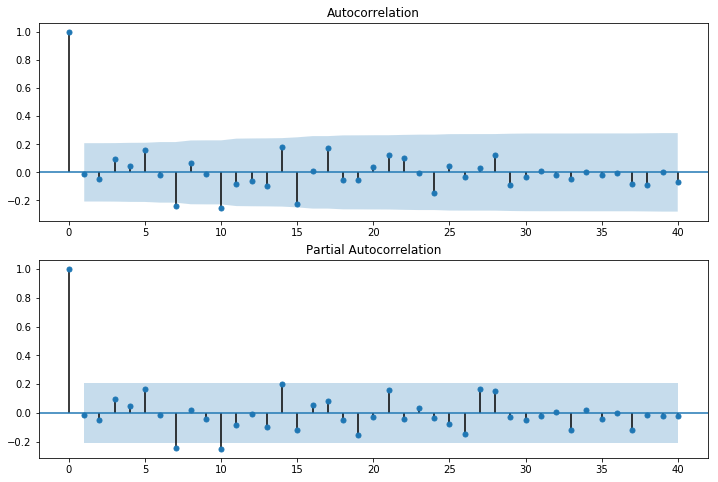

In [11]:
# 观察残差的ACF和PACF，判断ARMA模型是否完全涵盖了模型的自相关性
# 如果完全包含，则残差不应该自相关
# 如果观察到残差自相关，说明ARMA模型的阶数有问题，或者ARMA模型本身有问题
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)
plt.show()
# 此处残差已经基本完全随机，说明ARMA模型效果良好

In [12]:
# 残差D-W检验，结果越接近2，说明模型越准确，上下界分别为0和4
print(sm.stats.durbin_watson(arma_mod80.resid.values))

1.9893786581831883


In [13]:
print(sm.stats.durbin_watson(arma_mod70.resid.values))

2.0242448683523877


In [14]:
#输出 残差数据服从正态分布 出错误的统计学概率，即pvalue，越小越好
print(stats.normaltest(resid))
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
#绘制QQ图，观察残差数据与正态随机数据的分布区别，直观判断残差是否服从正态分布
fig = qqplot(resid, line='q', ax=ax, fit=True)
#plt.show()

NormaltestResult(statistic=5.992681760210792, pvalue=0.04996957893059981)


r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

2090-12-31   -1235.096870
2091-12-31    3468.772634
2092-12-31    1361.955467
2093-12-31     643.722465
2094-12-31    -560.188054
2095-12-31    -657.549220
2096-12-31   -2321.534855
2097-12-31    -784.983431
2098-12-31    2718.620118
2099-12-31    1171.038290
2100-12-31     280.622960
Freq: A-DEC, dtype: float64


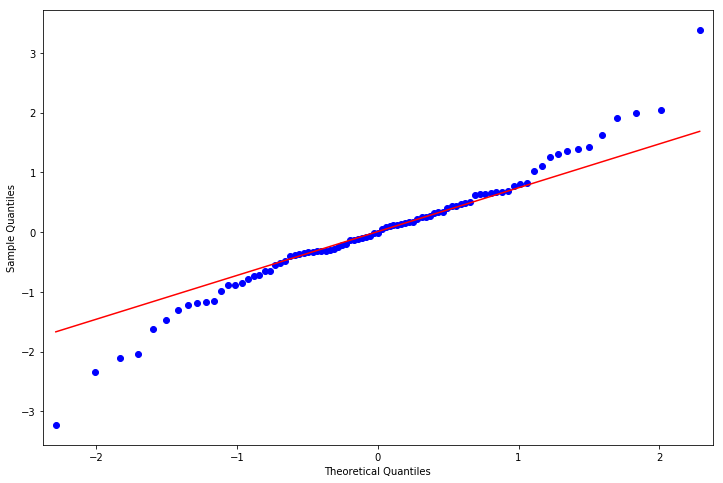

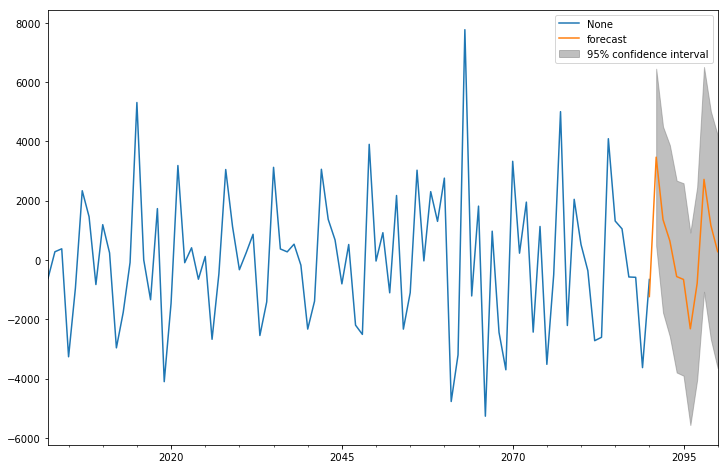

In [15]:
# 由ARMA(8,0)模型，以index = '2090'为初值，预测后续数据
predict_dta = arma_mod80.predict('2090', '2100', dynamic=True)
print(predict_dta)


fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['2000':].plot(ax=ax)
# 绘制预测结果
fig = arma_mod80.plot_predict('2090', '2100', dynamic=True, ax=ax, plot_insample=False)
plt.show()

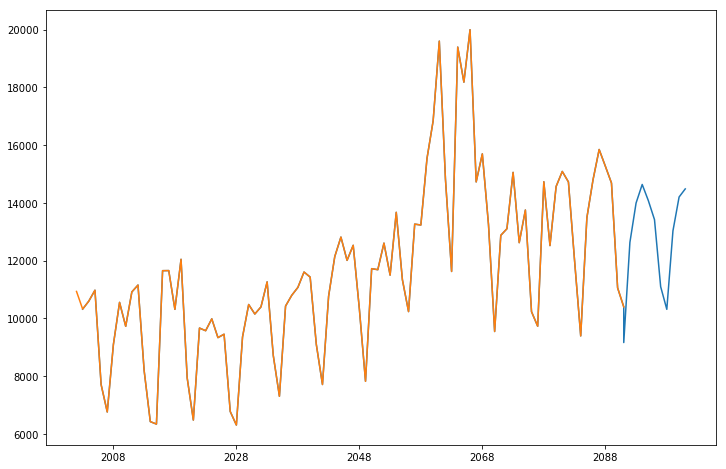

In [16]:
plt.subplots(figsize=(12, 8))
# 由一阶差分数据还原原数据并绘图
data = pd.concat([dta,predict_dta])
plt.plot(data.cumsum()+10930)
# 绘制原始数据与预测数据进行比对
plt.plot(dta0)
plt.show()

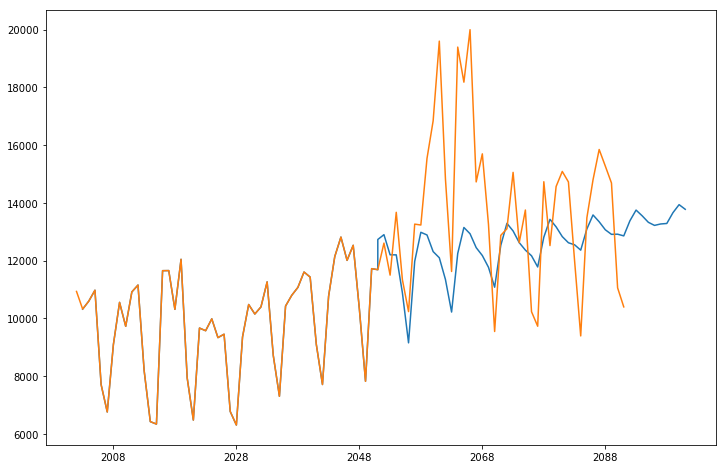

In [17]:
# 修改预测时间起点，对比预测结果与真实结果
predict_dta = arma_mod80.predict('2050', '2100', dynamic=True)
data = pd.concat([dta[:'2050'],predict_dta])
plt.subplots(figsize=(12, 8))
plt.plot(data.cumsum()+10930)
plt.plot(dta0)
plt.show()

# 第二部分 预测某股票走势

In [18]:
# 通过jaqs_fxdayu获取股票数据

start = 20160101
end = 20161001

from jaqs_fxdayu.data import DataView
from jaqs_fxdayu.data import RemoteDataService
from jaqs_fxdayu.data.dataservice import LocalDataService
import os
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

dataview_folder = '../Factor'
dv = DataView()
dv.load_dataview(dataview_folder)

Dataview loaded successfully.


In [19]:
#检验数据是否成功获取
dv.get_ts('close').tail()

symbol,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000059.SZ,...,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603799.SH,603833.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20171225,13.25,30.37,8.52,7.17,8.10,NaN,6.06,21.79,7.50,9.17,...,6.16,10.77,96.49,53.75,18.82,82.37,121.96,50.65,14.55,6.44
20171226,13.66,30.50,8.75,7.19,8.23,NaN,6.07,22.10,7.46,9.34,...,6.23,10.82,98.03,52.81,19.14,81.34,119.50,51.88,14.87,6.42
20171227,13.29,30.79,8.72,7.20,8.15,NaN,6.04,21.57,7.46,9.35,...,6.20,10.72,95.79,52.79,18.98,81.81,118.65,50.81,14.60,6.56
20171228,13.21,30.70,8.66,7.18,8.19,NaN,6.03,21.91,7.45,9.38,...,6.18,10.79,95.12,53.26,18.89,81.13,117.07,50.61,14.81,7.01
20171229,13.30,31.06,8.75,7.23,8.45,NaN,6.06,22.85,7.46,9.53,...,6.20,10.83,96.94,53.80,19.23,80.23,118.05,50.86,15.29,6.88


In [20]:
#导入datetime库，为后续修改时间索引做准备
from datetime import datetime

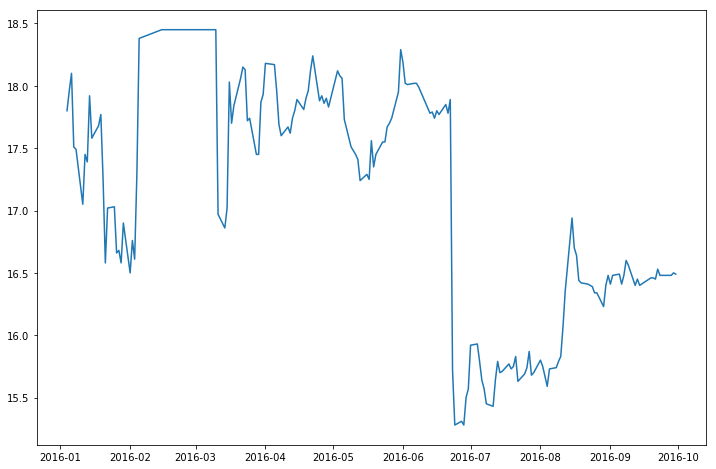

In [22]:
# 读取600000.SH的收盘价，进行后续预测
dta1 = dv.get_ts('close').loc[start:end,'600000.SH']
# 修改时间序列，使之能被sm识别
dta1.index = pd.Index(map(lambda x: datetime.strptime(str(x),"%Y%m%d") , dta1.index))
# 绘图观察数据趋势
plt.figure(figsize=(12,8))
plt.plot(dta1)
plt.show()

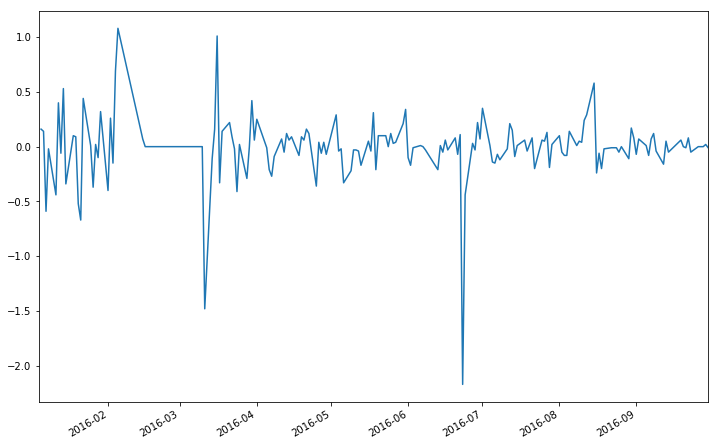

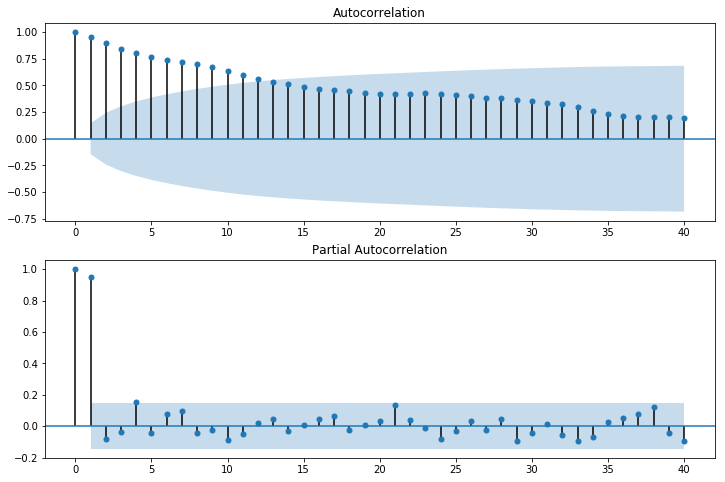

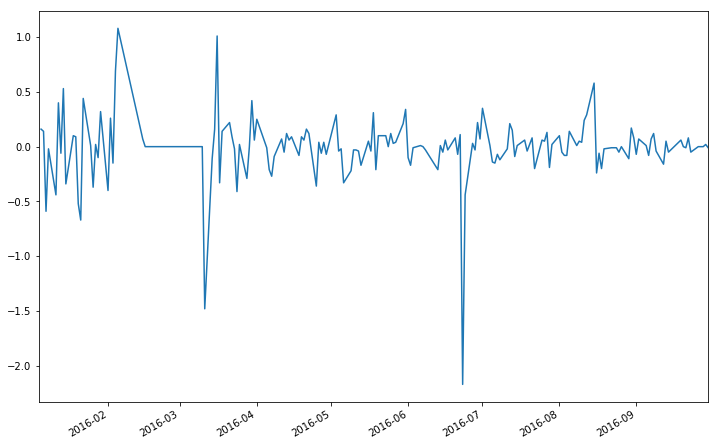

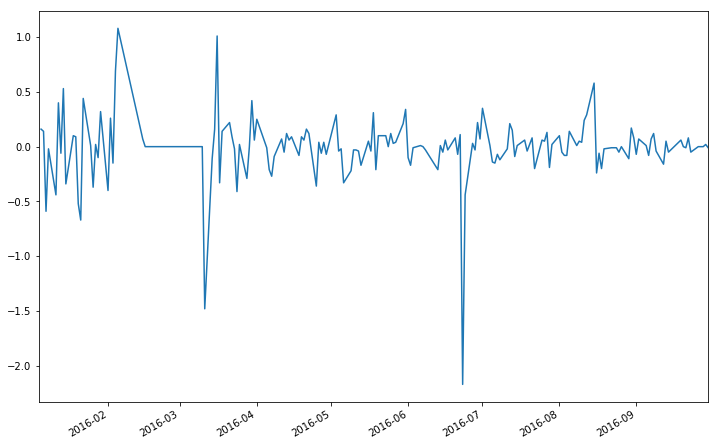

In [26]:
# 对数据一阶差分，观察数据趋势
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = dta1.diff(1)
diff1.plot(ax=ax1)
plt.show()

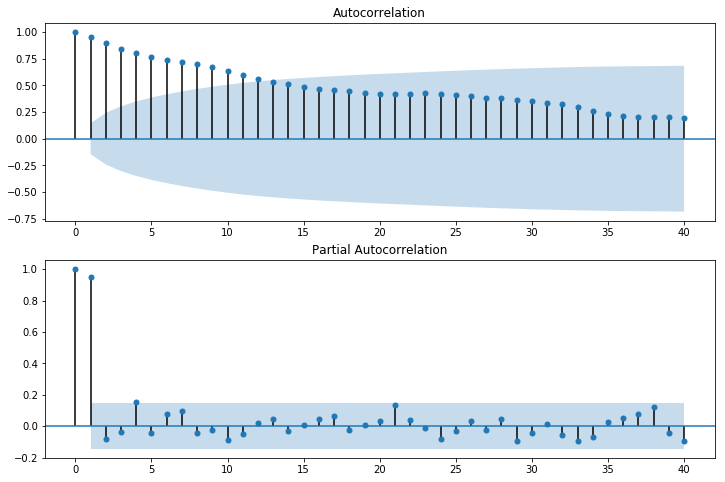

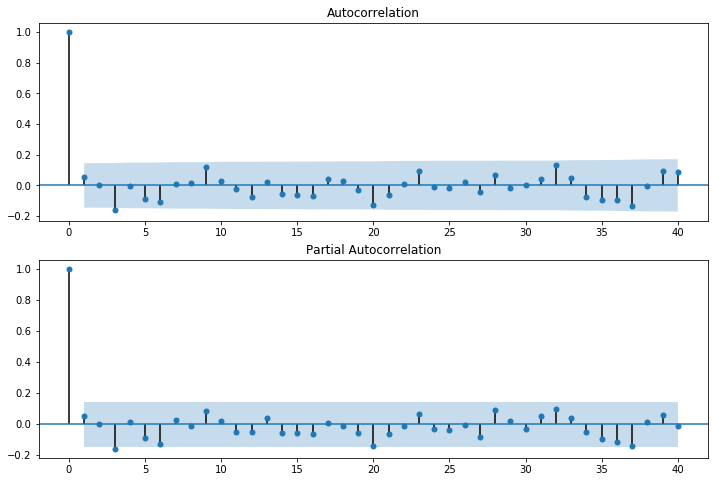

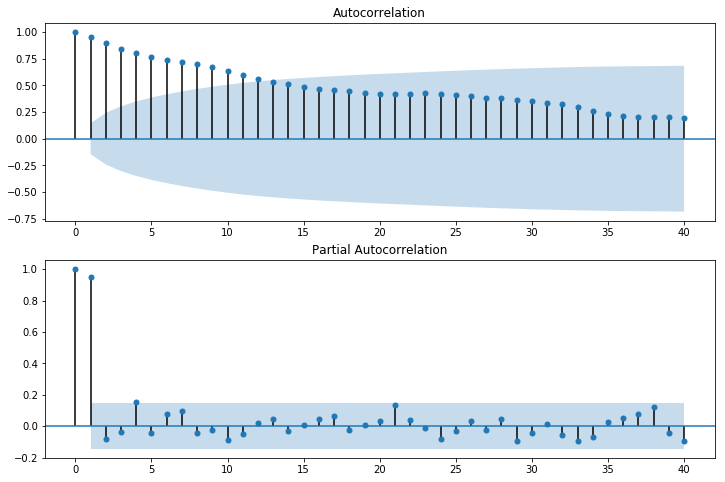

In [30]:
# 观察原始数据的ACF和PACF
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta1,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta1,lags=40,ax=ax2)
plt.show()

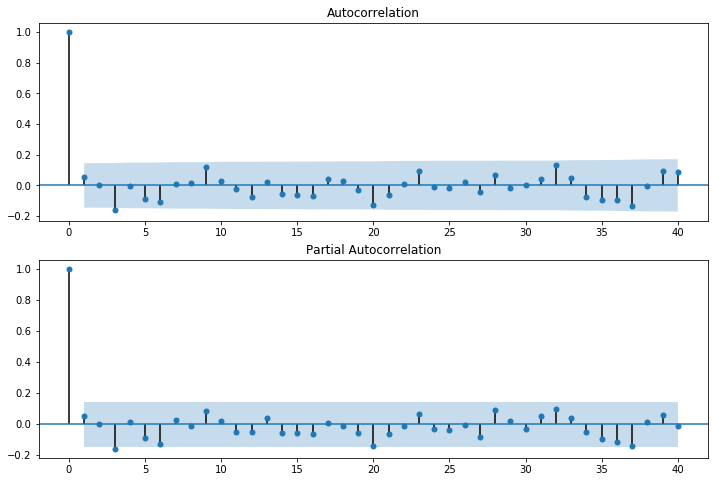

In [31]:
# 观察一阶差分数据的ACF和PACF
diff1= dta1.diff(1)[1:]
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff1,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff1,lags=40,ax=ax2)
plt.show()

In [29]:
# 计算各阶ARMA的AIC BIC HQIC值
arma_mod70 = sm.tsa.ARMA(dta1,(7,0)).fit()
print(arma_mod70.aic,arma_mod70.bic,arma_mod70.hqic)
arma_mod30 = sm.tsa.ARMA(dta1,(3,0)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod71 = sm.tsa.ARMA(dta1,(7,1)).fit()
print(arma_mod71.aic,arma_mod71.bic,arma_mod71.hqic)
arma_mod80 = sm.tsa.ARMA(dta1,(8,0)).fit()
print(arma_mod80.aic,arma_mod80.bic,arma_mod80.hqic)
arma_mod10 = sm.tsa.ARMA(dta1,(1,0)).fit()
print(arma_mod10.aic,arma_mod10.bic,arma_mod10.hqic)
arma_mod11 = sm.tsa.ARMA(dta1,(1,1)).fit()
print(arma_mod11.aic,arma_mod11.bic,arma_mod11.hqic)
arma_mod01 = sm.tsa.ARMA(dta1,(0,1)).fit()
print(arma_mod01.aic,arma_mod01.bic,arma_mod01.hqic)

73.34757297754493 102.2819947960258 85.07505483044953
72.15827312025891 88.23295190830385 78.67354081631703
74.84238315678323 106.99174073287308 87.87291854889946
75.02881514755575 107.1781727236456 88.05935053967198
69.52048268845158 79.16528996127853 73.42964330608645
70.43314397207592 83.29288700251186 75.64535812892241
330.43215737889534 340.0769646517223 334.3413179965302


In [32]:
resid = arma_mod10.resid

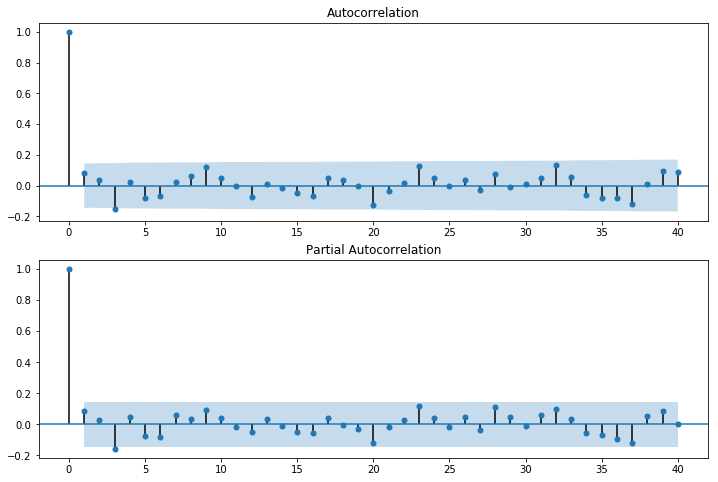

In [33]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)
plt.show()

In [34]:
print(sm.stats.durbin_watson(arma_mod10.resid.values))

1.8017479372650047


NormaltestResult(statistic=129.86263132424372, pvalue=6.319575478033609e-29)


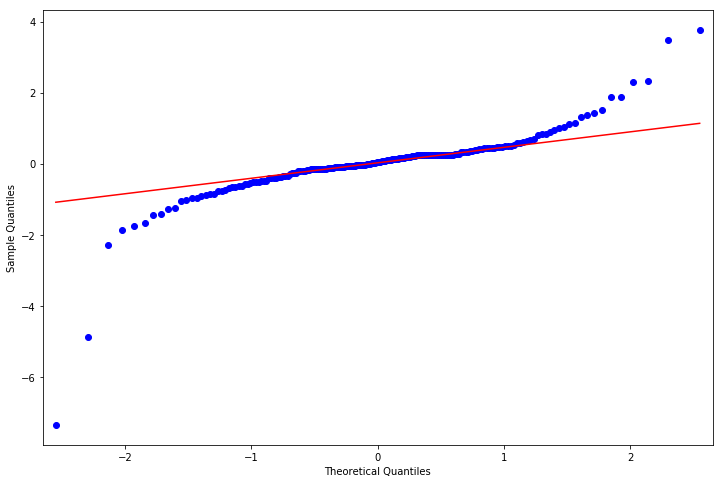

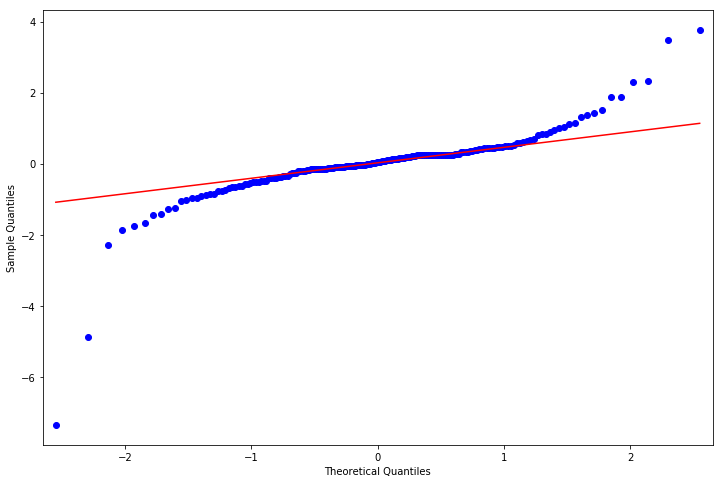

In [36]:
print(stats.normaltest(resid))
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)
plt.show()

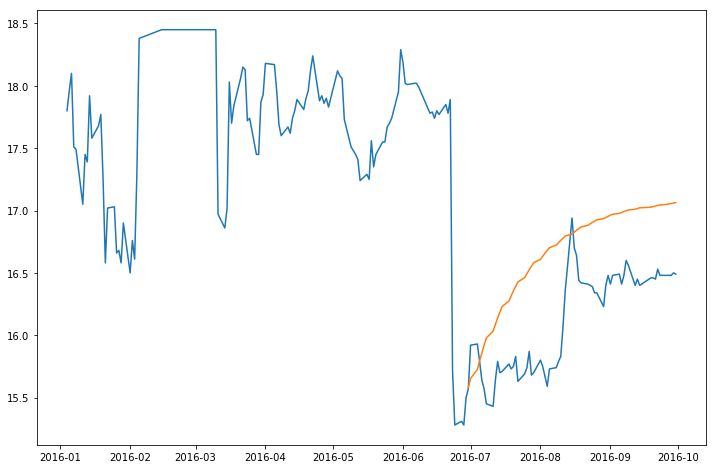

In [37]:
# 分别选取不同预测起点进行预测
# 2016m6即2016年6月最后一天
predict_dta = arma_mod10.predict('2016m6','2016m9', dynamic=True)
plt.subplots(figsize=(12, 8))
plt.plot(dta1)
plt.plot(predict_dta)
plt.show()

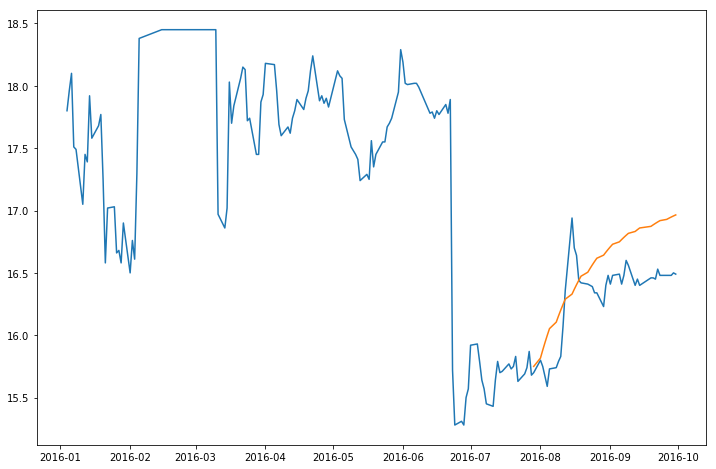

In [38]:
# 此处提供了表示时间的另一种方式
predict_dta = arma_mod10.predict(datetime.strptime('20160729',"%Y%m%d"),'2016m9', dynamic=True)
plt.subplots(figsize=(12, 8))
plt.plot(dta1)
plt.plot(predict_dta)
plt.show()

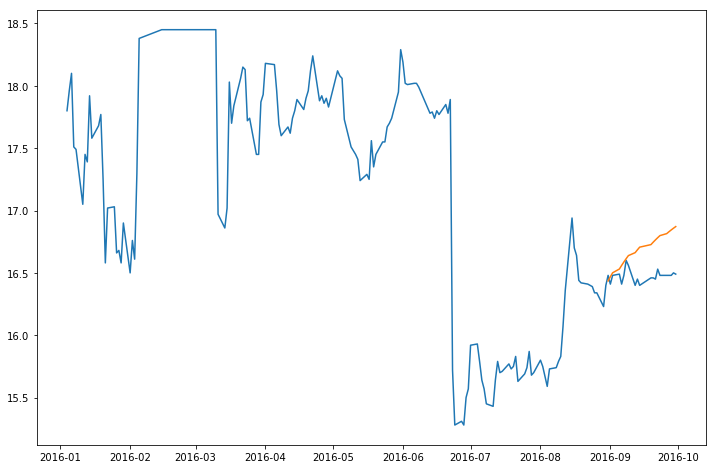

In [39]:
predict_dta = arma_mod10.predict('2016m8','2016m9', dynamic=True)
plt.subplots(figsize=(12, 8))
plt.plot(dta1)
plt.plot(predict_dta)
plt.show()